In [1]:
import cv2
import imutils
import numpy as np

from matplotlib import pyplot as plt

In [2]:
# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["Background", "Avion", "Vélo", "Oiseau", "Bateau",
           "Bouteille", "Bus", "Voiture", "Chat", "Chaise", "Vache", "Table",
           "Chien", "Cheval", "Moto", "Personne", "Plante", "Mouton",
           "Canapé", "Train", "Ecran"]

In [3]:
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [4]:
net = cv2.dnn.readNetFromCaffe("./model/MobileNetSSD_deploy.prototxt", "./model/MobileNetSSD_deploy.caffemodel")

In [5]:
meeting_room = cv2.imread("image/meeting_room_12.jpg")

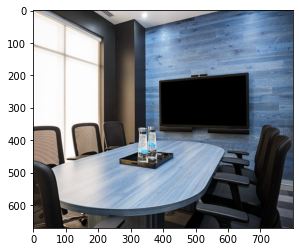

In [6]:
plt.imshow(meeting_room)
plt.show()

In [7]:
img = imutils.resize(meeting_room, width=400)

In [8]:
# grab the frame dimensions and convert it to a blob
(h, w) = img.shape[:2]

In [9]:
blob = cv2.dnn.blobFromImage(
        cv2.resize(img, (300, 300)),
        0.007843, (300, 300), 127.5)

In [10]:
# pass the blob through the network and obtain the detections and
# predictions
net.setInput(blob)
detections = net.forward()

In [11]:
# loop over the detections
for i in np.arange(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with
    # the prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
        # extract the index of the class label from the
        # `detections`, then compute the (x, y)-coordinates of
        # the bounding box for the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the prediction on the frame
        #label = "{}: {:.2f}%".format(
        #    CLASSES[idx],
        #    confidence * 100)
        label = CLASSES[idx]
        cv2.rectangle(
            img, (startX, startY), (endX, endY),
            COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(
            img, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

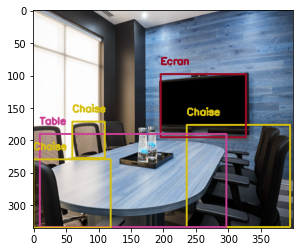

In [12]:
plt.imshow(img)
plt.show()